## Statistical Inference with Confidence Intervals

### How are Confidence Intervals Calculated?

Our equation for calculating confidence intervals is as follows:

$$Best\ Estimate \pm Margin\ of\ Error$$

Where the *Best Estimate* is the **observed population proportion or mean** and the *Margin of Error* is the **t-multiplier**.

The t-multiplier is calculated based on the degrees of freedom and desired confidence level.  For samples with more than 30 observations and a confidence level of 95%, the t-multiplier is 1.96

The equation to create a 95% confidence interval can also be shown as:

$$Population\ Proportion\ or\ Mean\ \pm (t-multiplier *\ Standard\ Error)$$

Lastly, the Standard Error is calculated differenly for population proportion and mean:

$$Standard\ Error \ for\ Population\ Proportion = \sqrt{\frac{Population\ Proportion * (1 - Population\ Proportion)}{Number\ Of\ Observations}}$$

$$Standard\ Error \ for\ Mean = \frac{Standard\ Deviation}{\sqrt{Number\ Of\ Observations}}$$

Lastly, the standard error for difference of population proportions and means is:

$$Standard\ Error\ for\ Difference\ of\ Two\ Population\ Proportions\ Or\ Means = \sqrt{(SE_{\ 1})^2 + (SE_{\ 2})^2}$$


population proportion :  sm.stats.proportion_confint(n*p,n) 

mean:                    sm.stats.DescrStatsW().zconfint_mean()

In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Agg')
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = "nhanes_2015_2016.csv"
da = pd.read_csv(url)

Note : For our population proportions, we will analyze the difference of proportion between female and male smoker. The columns that specifies smoker and non-smoker is ' SMQ020' in our dataset 

For our population means, we will analyze the difference of mean of body mass index within our female and male populations. The column that indicates the body mass index value is 'BMXBMI'

### Confidence intervals for one proportion

In [3]:
# Recode SMQ020 from 1/2 to Yes/No into new variable SMQ020x
da["SMQ020x"] = da.SMQ020.replace({1: "Yes", 2: "No", 7: np.nan, 9: np.nan})
da["SMQ020x"]

0       Yes
1       Yes
2       Yes
3        No
4        No
       ... 
5730    Yes
5731     No
5732    Yes
5733    Yes
5734     No
Name: SMQ020x, Length: 5735, dtype: object

In [4]:
# Recode RIAGENDR from 1/2 to Male/Female into new variable RIAGENDRx
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})
da["RIAGENDRx"]

0         Male
1         Male
2         Male
3       Female
4       Female
         ...  
5730    Female
5731      Male
5732    Female
5733      Male
5734    Female
Name: RIAGENDRx, Length: 5735, dtype: object

In [5]:
dx = da[["SMQ020x", "RIAGENDRx"]].dropna()
pd.crosstab(dx.SMQ020x, dx.RIAGENDRx)

RIAGENDRx,Female,Male
SMQ020x,,
No,2066,1340
Yes,906,1413


In [6]:
# Recode SMQ020x from Yes/No to 1/0 into existing variable SMQ020x
dx["SMQ020x"] = dx.SMQ020x.replace({"Yes": 1, "No": 0})

In [7]:
dz = dx.groupby("RIAGENDRx").agg({"SMQ020x": [np.mean, np.size]})
dz.columns = ['proportion', 'Total n']
dz
# dz gives us the porportion of people who do smoke 

,proportion,Total n
RIAGENDRx,,
Female,0.304845,2972
Male,0.513258,2753


In [8]:
dz = dx.groupby("RIAGENDRx")["SMQ020x"].value_counts()
dz

RIAGENDRx  SMQ020x
Female     0          2066
           1           906
Male       1          1413
           0          1340
Name: SMQ020x, dtype: int64

In a routine data analysis, we do not need to calculate these intervals manually. We can use the Statsmodels library to calculate the CI for us in one line

In [9]:
# 95% CI for the proportion of females who smoke
sm.stats.proportion_confint(906,906+2066)

(0.2882949879861214, 0.32139545615923526)

In [10]:
# 95% CI for the proportion of males who smoke 
sm.stats.proportion_confint(1413,1413+1340)

(0.49458749263718593, 0.5319290347874418)

### Difference of Two Population Proportions
The confidence intervals for the proportions of female and male smokers shown above are quite narrow and do not overlap. This suggests that there is a substantial difference between the lifetime smoking rates for women and men. However there is no explicit information here about how different the two population proportions might be. To address this question, we can form a confidence interval for the difference between the proportion of females who smoke and the proportion of males who smoke.

In [11]:
p = .304845
n = 2972
se_female = np.sqrt(p * (1 - p)/n)
se_female

0.00844415041930423

In [12]:
p = .513258
n = 2753
se_male = np.sqrt(p * (1 - p)/ n)
se_male

0.009526078787008965

In [13]:
se_diff = np.sqrt(se_female**2 + se_male**2)
se_diff

0.012729880335656654

NOte : The standard error of around 0.013 indicates that the estimated difference statistic -0.208 is expected to fall around 0.013 units from the true value. We do not know in which direction the error lies, and we do not know that the error is exactly 0.013, only that it is around this large on average. For most purposes, a standard error of 0.013 relative to an observed difference of -0.21 would be considered very small. That is, we have a very accurate estimate of the difference between smoking rates in women and in men.

In [14]:
d = .304845 - .513258
lcb = d - 1.96 * se_diff
ucb = d + 1.96 * se_diff
(lcb, ucb)

(-0.23336356545788706, -0.18346243454211297)

The 95% confidence interval above shows us that any value for the difference of population proportions(between females and males) lying between -0.233 and -0.183 is consistent with the observed data

#### Difference of Two Population Means

In [15]:
da["BMXBMI"].head()

0    27.8
1    30.8
2    28.8
3    42.4
4    20.3
Name: BMXBMI, dtype: float64

In [16]:
da.groupby("RIAGENDRx").agg({"BMXBMI": [np.mean, np.std, np.size]})

BMXBMI                  
                mean       std    size
RIAGENDRx                             
Female     29.939946  7.753319  2976.0
Male       28.778072  6.252568  2759.0

In [17]:
sem_female = 7.753319 / np.sqrt(2976)
sem_male = 6.252568 / np.sqrt(2759)
(sem_female, sem_male)

(0.14212523289878048, 0.11903716451870151)

In [18]:
sem_diff = np.sqrt(sem_female**2 + sem_male**2)
sem_diff

0.18538993598139303

In [19]:
lcb = d - 1.96 * sem_diff
ucb = d + 1.96 * sem_diff
(lcb, ucb)

(-0.5717772745235303, 0.1549512745235303)

### Confidence intervals for subpopulations

Since smoking rates rates strongly with age, it might be more informative to stratify the data into homogeneous age band and compare the proportions of female and male smokers within each age band. 

Text(0, 0.5, 'Female - Male smoking proportion')

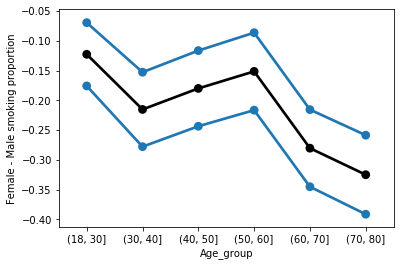

In [55]:
# Calculate the smoking rates within age/gender groups
da['agegrp'] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
pr = da.groupby(['agegrp', 'RIAGENDRx']).agg({'SMQ020x': lambda x: np.mean(x == 'Yes')}).unstack()
pr.columns = ['Female','Male']

#The number of people for each calculated proportion
dn = da.groupby(["agegrp", "RIAGENDRx"]).agg({'SMQ020x': np.size}).unstack()
dn.columns = ['Female', 'Male']

# std error for each proportion
se = np.sqrt(pr * (1 - pr)/dn)

# std error for the difference in female/male smoking rates in every age band
se_diff = np.sqrt(se.Female**2 + se.Male**2)

# The difference in smoking rates between genders
pq = pr.Female - pr.Male

x = np.arange(pq.size)
pp = sns.pointplot(x, pq.values, color = 'black')
sns.pointplot(x, pq - 2*se_diff)
sns.pointplot(x, pq + 2*se_diff)
pp.set_xticklabels(pq.index)
pp.set_xlabel('Age_group')
pp.set_ylabel('Female - Male smoking proportion')

The plot above shows for each age band, the point estimate of difference in smoking rates bewtween genders(black dots), and the lower and upper end points of the 95% confidence interval(blue points).Based on this plot, we see that in the US, smoking is more common in men than women, not just overall, but also in every one of the age band. The difference is largest for older people -- for people older than 60, the smoking rate for males is around 30% greater than smoking rate for females, while for people younger than 30, the smoking rate for males is only around 15% point greater than the smoking rate for females. 

## Confidence intervals for mean

In [56]:
da.groupby('RIAGENDRx').agg({'BMXBMI' : np.mean})

,BMXBMI
RIAGENDRx,
Female,29.939946
Male,28.778072


In [61]:
da.groupby('RIAGENDRx').agg({'BMXBMI': [np.mean , np.std, np.size]})

BMXBMI                  
                mean       std    size
RIAGENDRx                             
Female     29.939946  7.753319  2976.0
Male       28.778072  6.252568  2759.0

sem_female = 7.753 / np.sqrt(2976)
sem_male = 6.253 / np.sqrt(2759)
print(sem_female, sem_male)

The sample mean BMI for women is expected to be off by around 0.14 relative to the population mean BMI for women, and the sample mean BMI for men is expected to be off by around 0.12 relative to the population mean for BMI for men

The standard error of the mean for women is slightly larger for women than for men.The reason for this is that even though the enhanes sample size for women is slightly larger than that for men, the data for women appears to be more spread out. The greater std for the female BMI values leads in turn to less precision when estimating the population mean BMI for females.

In [67]:
lcb_female = 29.94 - 1.96 * 7.753 / np.sqrt(2976)
ucb_female = 29.94 + 1.96 * 7.753 / np.sqrt(2976)
print(lcb_female, ucb_female)

29.661446004723665 30.218553995276338


In [68]:
female_bmi = da.loc[da.RIAGENDRx == 'Female' , 'BMXBMI'] .dropna()
sm.stats.DescrStatsW(female_bmi).zconfint_mean()

(29.659875498090155, 30.22001580625768)

## Confidence intervals for the difference between two means 

In [69]:
sem_diff = np.sqrt(sem_female**2 + sem_male**2)
sem_diff

0.18539073420811059

In [70]:
bmi_diff = 29.94 - 28.78
lcb = bmi_diff - 2*sem_diff
ucb = bmi_diff + 2*sem_diff
(lcb, ucb)

(0.789218531583779, 1.5307814684162213)

### Age-stratified confidence intervals

              BMXBMI                                                         \
                mean                  std             size              sem   
RIAGENDRx     Female       Male    Female      Male Female   Male    Female   
agegrp                                                                        
(18, 30]   28.123881  27.391822  7.745893  6.649440  609.0  544.0  0.313879   
(30, 40]   30.325586  29.611726  8.315608  6.622412  474.0  458.0  0.381949   
(40, 50]   31.160643  29.724623  8.076195  6.407076  502.0  401.0  0.360458   
(50, 60]   30.743777  29.231486  7.575848  5.914373  470.0  454.0  0.349448   
(60, 70]   31.074828  29.392488  7.604514  5.933307  441.0  437.0  0.362120   
(70, 80]   29.138213  27.957692  6.284968  4.974855  410.0  402.0  0.310392   

                                                             
                    mean_diff  sem_diff  lcb_diff  ucb_diff  
RIAGENDRx      Male                                          
agegrp                 

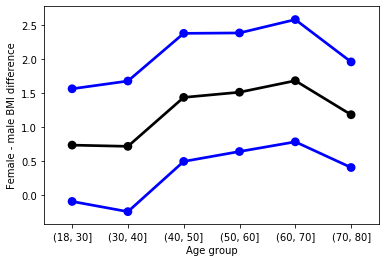

In [90]:
# Calculate the mean, SD, and sample size for BMI within age/gender groups
da['agegrp'] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
pr = da.groupby(['agegrp', 'RIAGENDRx']).agg({'BMXBMI' : [np.mean, np.std, np.size]}).unstack()

# Calculate the SEM for females and for males within each age band 
pr['BMXBMI', 'sem', 'Female'] = pr['BMXBMI', 'std', 'Female'] / np.sqrt(pr['BMXBMI', 'size', 'Female'])
pr['BMXBMI', 'sem', 'Male'] = pr['BMXBMI', 'std', 'Male'] / np.sqrt(pr['BMXBMI', 'size', 'Male'])

# Calculate the mean difference of BMI between females and males within each age band, also  calculate
# its SE and the lower and upper limits of its 95% CI.
pr["BMXBMI", "mean_diff", ""] = pr["BMXBMI", "mean", "Female"] - pr["BMXBMI", "mean", "Male"]
pr["BMXBMI", "sem_diff", ""] = np.sqrt(pr["BMXBMI", "sem", "Female"]**2 + pr["BMXBMI", "sem", "Male"]**2)
pr["BMXBMI", "lcb_diff", ""] = pr["BMXBMI", "mean_diff", ""] - 1.96 * pr["BMXBMI", "sem_diff", ""] 
pr["BMXBMI", "ucb_diff", ""] = pr["BMXBMI", "mean_diff", ""] + 1.96 * pr["BMXBMI", "sem_diff", ""] 

# Plot the mean difference in black and the confidence limits in blue
x = np.arange(pr.shape[0])
pp = sns.pointplot(x, pr['BMXBMI', 'mean_diff', ''], color = 'black')
sns.pointplot(x, pr['BMXBMI', 'lcb_diff', ''], color = 'blue')
sns.pointplot(x, pr['BMXBMI', 'ucb_diff', ''], color = 'blue')
pp.set_xticklabels(pr.index)
pp.set_xlabel("Age group")
pp.set_ylabel("Female - male BMI difference")
print(pr)